# Урок 4 РАБОТА С ГРЯЗНЫМИ ДАННЫМИ мини проект

Описание
На этот раз данные имеют следующую структуру:

записываются для каждого пользователя, совершившего покупки, каждый день
для каждой даты есть своя папка, внутри неё – папки для каждого пользователя
внутри каждой папки есть файл data.csv, где и хранятся данные
Схематично выглядит так:

└── data
   ├── 2020-12-30
   │  ├── FirstName_LastName1
   │  │   └── data.csv
   │  ├── FirstName_LastName2
   │  │   └── data.csv
   │  └── FirstName_LastName3
   │      └── data.csv
   └── 2020-12-31
      ├── FirstName_LastName1
      │   └── data.csv
      └── FirstName_LastName5
          └── data.csv
Например, 30 декабря три покупателя сделали покупки, 31 – два 
(папки 2020-12-30 и 2020-12-31 соответственно). Поскольку клиент FirstName_LastName1 купил товары в оба дня, 
для него имеется папка в папке для каждой из дат. Для других клиентов – по одной.

Note: данные в задании покрывают другой временной период, имена тоже другие. Подробности, 
    примеры и возможные подсказки можно найти в текстах следующих шагов.

      

Задачи
Соберите все данные из папки data в один датафрэйм, имеющий следующие столбцы: колонки из самих файлов (product_id, quantity), 
    а также имя пользователя (name), и дата этих покупок (date), соответствует названию папки, где лежит папка с пользователем)
Выясните, какой пользователь купил больше всего товаров. Если их несколько, то перечислите имена через запятую с пробелом 
и в алфавитном порядке.
Найдите топ-10 товаров по числу проданных единиц за всё время и постройте барплот. Сколько было продано единиц товара 
с product_id==56?
Визуализируйте продажи по дням.
Сколько пользователей приобрели какой-либо товар повторно (более 1 раза)? Повтором будем считать покупку товара 
с одинаковым product_id, совершенную в разные дни. 
Найти данные можно либо на JupyterHub, либо скачать архив отсюда.

In [46]:
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt 
%matplotlib inline   

In [14]:
# путь к текущей папки
os.getcwd()

'/mnt/HC_Volume_18315164/home-jupyter/jupyter-s-kamsarin/learn_pandas'

In [12]:
#  поиск папок через '~/' b  и нажатии клавиши таб
os.listdir("/mnt/HC_Volume_18315164/home-jupyter/jupyter-s-kamsarin/shared/homeworks/python_ds_miniprojects/4/data/")

['2020-12-05',
 '2020-12-08',
 '2020-12-09',
 '2020-12-04',
 '2020-12-06',
 '2020-12-03',
 '2020-12-07']

In [13]:
path_to_data = "/mnt/HC_Volume_18315164/home-jupyter/jupyter-s-kamsarin/shared/homeworks/python_ds_miniprojects/4/data/"


In [56]:
df_date = pd.DataFrame()
df_date_2 = pd.DataFrame()

In [57]:
# перебрал тремя циклами все файлы
for i in os.listdir(path_to_data):
#     print(i)
    for j in os.listdir(path_to_data + '/' + i):
#         print(j)
        for w in os.listdir(path_to_data + '/' + i + '/' + j ):
#             print(w)
            tmp = (path_to_data + '/' + i + '/' + j + '/' + w)
            s_name = tmp.split('/')[-2]        
            s_date = tmp.split('/')[-3]        
            df1 = pd.read_csv(tmp)
            df1['name'] = s_name
            df1['date'] = s_date        
            df_date = df_date.append(df1)
            

In [58]:
df_date = df_date.reset_index(drop=True)

In [59]:
df_date

,Unnamed: 0,product_id,quantity,name,date
0,0,27,4,Petr_Ivanov,2020-12-05
1,1,89,1,Petr_Ivanov,2020-12-05
2,2,33,2,Petr_Ivanov,2020-12-05
3,3,8,3,Petr_Ivanov,2020-12-05
4,4,16,1,Petr_Ivanov,2020-12-05
...,...,...,...,...,...
156,0,18,4,Petr_Fedorov,2020-12-07
157,1,94,4,Petr_Fedorov,2020-12-07
158,0,95,2,Vasiliy_Ivanov,2020-12-07
159,1,83,3,Vasiliy_Ivanov,2020-12-07


In [60]:
df_date.quantity.sum()

480

In [61]:
# второй альтернативный вариант ) подсмотренный в папках
for path, dirs, files in os.walk(path_to_data):
    for fname in files:
        s = os.path.join(path, fname)
        s_name = s.split('/')[-2]        
        s_date = s.split('/')[-3]        
        df2 = pd.read_csv(s)        
        df2['name'] = s_name
        df2['date'] = s_date
        df_date_2 = pd.concat([df_date_2, df2])
df_date_2 = df_date_2.reset_index(drop=True)        
df_date_2.quantity.sum()

480

In [62]:
df_date_2

,Unnamed: 0,product_id,quantity,name,date
0,0,27,4,Petr_Ivanov,2020-12-05
1,1,89,1,Petr_Ivanov,2020-12-05
2,2,33,2,Petr_Ivanov,2020-12-05
3,3,8,3,Petr_Ivanov,2020-12-05
4,4,16,1,Petr_Ivanov,2020-12-05
...,...,...,...,...,...
156,0,18,4,Petr_Fedorov,2020-12-07
157,1,94,4,Petr_Fedorov,2020-12-07
158,0,95,2,Vasiliy_Ivanov,2020-12-07
159,1,83,3,Vasiliy_Ivanov,2020-12-07


Задание 2
Выясните, какой пользователь купил больше всего товаров. Если их несколько, то перечислите имена через запятую с пробелом и в алфавитном порядке. Например:



In [82]:
df_date_sum = df_date.groupby('name', as_index = False).agg({'quantity': 'sum'}).sort_values('quantity')

In [89]:
df_date.groupby('name', as_index = False).agg({'quantity': 'sum'}).sort_values('quantity')

,name,quantity
20,Vasiliy_Petrov,7
2,Alexey_Petrov,7
15,Rostislav_Ivanov,9
8,Kirill_Petrov,9
12,Petr_Petrov,14
18,Vasiliy_Fedorov,15
14,Rostislav_Fedorov,16
1,Alexey_Ivanov,17
17,Rostislav_Smirnov,17
9,Kirill_Smirnov,17


In [101]:
df_date_sum.query('quantity == 52')

,name,quantity
3,Alexey_Smirnov,52
13,Petr_Smirnov,52


Ответ на задание 2 : Alexey_Smirnov, Petr_Smirnov

Задание 3
Найдите топ-10 товаров по числу проданных единиц за всё время и постройте барплот (столбчатую диаграмму, sns.barplot), где:

по оси x – идентификаторы товаров (product_id) 
по оси y – суммарное число их покупок (сколько товаров с таким product_id было продано)
Для практики попробуйте изменить параметры графика: цвет (color), прозрачность (alpha), сортировку значений по оси х (order). 

В качестве ответа укажите, сколько было продано единиц товара с product_id равным 56.

In [102]:
df_date

,Unnamed: 0,product_id,quantity,name,date
0,0,27,4,Petr_Ivanov,2020-12-05
1,1,89,1,Petr_Ivanov,2020-12-05
2,2,33,2,Petr_Ivanov,2020-12-05
3,3,8,3,Petr_Ivanov,2020-12-05
4,4,16,1,Petr_Ivanov,2020-12-05
...,...,...,...,...,...
156,0,18,4,Petr_Fedorov,2020-12-07
157,1,94,4,Petr_Fedorov,2020-12-07
158,0,95,2,Vasiliy_Ivanov,2020-12-07
159,1,83,3,Vasiliy_Ivanov,2020-12-07


In [110]:
top_10 = df_date.groupby('product_id', as_index = False).agg({'quantity': 'sum'}).sort_values('quantity', ascending = False).head(10)

In [111]:
top_10

,product_id,quantity
22,27,20
42,56,18
21,24,15
51,74,15
32,41,14
27,34,13
66,94,13
46,66,13
65,92,12
38,50,12


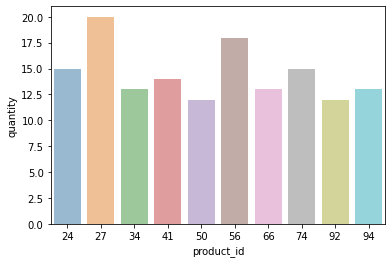

In [119]:
sns.barplot(x=top_10.product_id, y=top_10.quantity, alpha = 0.5)

Задание 4
Посмотрим на продажи по дням! Для визуализации снова используйте барплот, только теперь по оси x будут дни, 
по которым у нас есть данные (date). 
Далее выберите верные утверждения:

In [124]:
data_sum = df_date.groupby('date', as_index = False).agg({'quantity': 'sum'}).sort_values('date', ascending = False)

In [125]:
data_sum

,date,quantity
6,2020-12-09,69
5,2020-12-08,68
4,2020-12-07,94
3,2020-12-06,15
2,2020-12-05,61
1,2020-12-04,113
0,2020-12-03,60


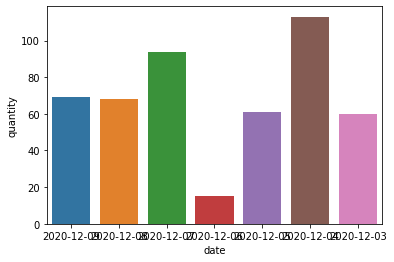

In [127]:
sns.barplot(x='date', y='quantity', data=data_sum)

Задание 5
💀 Сложное задание! 💀

Сколько пользователей приобрели какой-либо товар повторно (более 1 раза)? Повтором будем считать покупку товара с одинаковым product_id, совершенную в разные дни. 

Например, пользователь Sasha Tsarev дважды приобрел товар 6. Поскольку покупка была совершена в один и тот же день, повторной в данном случае она считаться не будет. Katya Skriptsova также сделал две покупки товара 7, но в разные дни, поэтому этот случай засчитывается.
    

product_id quantity name              date
25         2        Katya Skriptsova  2020-12-05
54         1        Olya Silyutina    2020-12-05    
7          4        Katya Skriptsova  2020-12-05  
6          4        Sasha Tsarev      2020-12-06
6          1        Sasha Tsarev      2020-12-06
7          5        Katya Skriptsova  2020-12-06  
Может пригодиться: .drop_duplicates()

Если нужна помощь, напишите сюда

In [128]:
df_date

,Unnamed: 0,product_id,quantity,name,date
0,0,27,4,Petr_Ivanov,2020-12-05
1,1,89,1,Petr_Ivanov,2020-12-05
2,2,33,2,Petr_Ivanov,2020-12-05
3,3,8,3,Petr_Ivanov,2020-12-05
4,4,16,1,Petr_Ivanov,2020-12-05
...,...,...,...,...,...
156,0,18,4,Petr_Fedorov,2020-12-07
157,1,94,4,Petr_Fedorov,2020-12-07
158,0,95,2,Vasiliy_Ivanov,2020-12-07
159,1,83,3,Vasiliy_Ivanov,2020-12-07


In [170]:
df_date.drop_duplicates(subset =['product_id','date','name'])


,Unnamed: 0,product_id,quantity,name,date
0,0,27,4,Petr_Ivanov,2020-12-05
1,1,89,1,Petr_Ivanov,2020-12-05
2,2,33,2,Petr_Ivanov,2020-12-05
3,3,8,3,Petr_Ivanov,2020-12-05
4,4,16,1,Petr_Ivanov,2020-12-05
...,...,...,...,...,...
156,0,18,4,Petr_Fedorov,2020-12-07
157,1,94,4,Petr_Fedorov,2020-12-07
158,0,95,2,Vasiliy_Ivanov,2020-12-07
159,1,83,3,Vasiliy_Ivanov,2020-12-07


In [171]:
df_date.loc[df.duplicated(subset =['product_id','name'])]

,Unnamed: 0,product_id,quantity,name,date
48,2,55,5,Alexey_Smirnov,2020-12-09
155,0,15,4,Anton_Ivanov,2020-12-07
157,1,94,4,Petr_Fedorov,2020-12-07


In [169]:
df_date.drop_duplicates(subset =['date' ,'name','product_id']).loc[df.duplicated(subset =['product_id','name'])]

,Unnamed: 0,product_id,quantity,name,date
155,0,15,4,Anton_Ivanov,2020-12-07
157,1,94,4,Petr_Fedorov,2020-12-07


Дополнительный проект
И небольшой минипроект на фильтрацию данных!

Имеется таблица с записями о компаниях, включая их ИНН, и отдельный текстовый файл с набором ИНН (колонка head_inn), которые хранятся в папке 4_inn.

inn.xls — таблица в экселевском формате
necessary_inn.txt — перечень необходимых ИНН в текстовом формате
Задачи:
извлечь из таблицы записи с ИНН, указанными в текстовом файле
записать результат в файл selected_inn.csv

In [1]:
import pandas as pd

In [3]:
df_inn_data = pd.read_excel('/mnt/HC_Volume_18315164/home-jupyter/jupyter-s-kamsarin/shared/homeworks/python_ds_miniprojects/4_inn/inn.xls')

In [8]:
df_inn_sp = pd.read_csv('/mnt/HC_Volume_18315164/home-jupyter/jupyter-s-kamsarin/shared/homeworks/python_ds_miniprojects/4_inn/necessary_inn.txt', header = None)

In [10]:
df_inn_data.head()

,Unnamed: 0,#,name,reg_number,address,head,head_job,head_inn,phone,email,site,registration_date,nalogoplatelschik_code,oktmo_code,okato_code,registration_region,okato_name,field,"capital,RUB","income,RUB"
0,0,0,"ЗАО «Власова, Макаров и Шашков»",1143692580560,"д. Кирово-Чепецк, пр. Металлургов, д. 537 к. 3...",Жданов Карл Виленович,Маммолог,109092209811,+7 (559) 338-87-76,bogdanovavtonom@yahoo.com,ooo.info,2015-01-07,2006-10-04,21112877268,73423615032,Ulan-Ude,"к. Тосно, ул. Пушкинская, д. 896, 617222",Синхронизация критически важных отношений,54875526078,32205872896
1,1,1,"РАО «Тимофеева, Алексеева и Кузнецова»",9342309660697,"г. Арзамас, наб. Фестивальная, д. 7 стр. 8/2, ...",Рожков Харлампий Алексеевич,Воспитатель,704229465069,8 (632) 620-8879,safonovantonin@rao.org,ooo.net,1990-05-16,2019-01-18,18393547520,19072454279,Tyoply Stan,"ст. Кяхта, бул. Нефтяников, д. 24, 768742",Формирование заказных методик,33876448811,47437574301
2,2,2,РАО «Юдин-Ефимова»,1277485323451,"п. Меренга, алл. Достоевского, д. 3/4 к. 497, ...",Филимон Фадеевич Дьячков,Автослесарь,267655036377,+74925330378,kdorofeev@npo.ru,ao.com,1982-11-04,1986-06-19,56104355836,18629292792,Danilov,"клх Усолье Сибирское, алл. Шишкина, д. 3/9 к. ...",Максимизация корпоративных метрик,94073834991,7701710065
3,3,3,Доронин Инкорпорэйтед,7139161431511,"д. Иваново, ул. Красных Партизан, д. 83 к. 4, ...",Крылов Глеб Якубович,Тюремный надзиратель,362024991175,+7 118 643 21 48,nkulakova@mail.ru,ooo.ru,2005-01-02,2004-04-06,10398489351,32502585383,Beryozovsky,"г. Заводоуковск, ул. Гражданская, д. 7 к. 8/5,...",Разработка ориентированных на пользователя инт...,86971505490,61148002572
4,4,4,Объединенная энергетическая компания,6114798049639,"к. Энгельс, наб. Шишкина, д. 120, 823828",Субботин Вячеслав Федотович,Инженер-электрик,257948948010,8 642 249 2134,evgraf_18@yahoo.com,gerasimova.biz,1983-07-02,1992-06-20,20074507047,40083207999,Bavly,"к. Соль-Илецк, пер. Пригородный, д. 804 к. 1/3...",Монетизация интуитивных веб-сервисов,36351136214,34861533393


In [21]:
df_inn_data.dtypes

Unnamed: 0                 int64
#                          int64
name                      object
reg_number                 int64
address                   object
head                      object
head_job                  object
head_inn                   int64
phone                     object
email                     object
site                      object
registration_date         object
nalogoplatelschik_code    object
oktmo_code                 int64
okato_code                 int64
registration_region       object
okato_name                object
field                     object
capital,RUB                int64
income,RUB                 int64
dtype: object

In [9]:
df_inn_sp

,0
0,394609645484
1,281578625230
2,923769811917
3,998694734508
4,271011690615
...,...
110,664306216794
111,991951385204
112,129413497752
113,447901012904


In [20]:

df_inn_sp

,0
0,394609645484
1,281578625230
2,923769811917
3,998694734508
4,271011690615
...,...
110,664306216794
111,991951385204
112,129413497752
113,447901012904


In [39]:
# так можно в список перевести )) !!! чтоб потом не так ('head_inn in @df_inn_sp[0]') а напрямую @
df_inn_sp[0].tolist()

[394609645484,
 281578625230,
 923769811917,
 998694734508,
 271011690615,
 924952812367,
 646685244561,
 581531230312,
 841967395801,
 962179889311,
 873191383820,
 590538076039,
 194319975048,
 614658394086,
 571270160555,
 609400911893,
 595260069852,
 706966142477,
 173050718969,
 968048428696,
 806967744814,
 575198252501,
 283081417246,
 663119569897,
 600958529354,
 280452832937,
 415557497037,
 195142638722,
 472181033836,
 722903871682,
 442387408954,
 196518820495,
 653798670054,
 126259856639,
 175482780898,
 192518356612,
 817648134701,
 321724220657,
 864970037680,
 822991191528,
 205472219644,
 532801459453,
 657038381012,
 197916669463,
 849814898285,
 617082656257,
 500480544925,
 765833725639,
 263518962896,
 415856290529,
 812729265571,
 688172366656,
 837771137752,
 456294893364,
 668157292633,
 491435460276,
 323896131459,
 664667769879,
 293128896936,
 833493884251,
 120708914823,
 860475372268,
 172328288163,
 452188261986,
 818829342640,
 948029225406,
 310163740

In [25]:
df_inn_sp.dtypes

0    int64
dtype: object

In [35]:
df_inn_data_csv = df_inn_data.query('head_inn in @df_inn_sp[0]')

In [36]:
df_inn_data.query('head_inn in @df_inn_sp[0]')['income,RUB'].sum()

6104522627393

In [37]:
df_inn_data_csv.to_csv('df_inn_data_csv.csv')